# Copernicus Marine Toolbox
Notebook for the presentation of the Copernicus Marine Toolbox (CMT).
For more detailed information, you can check [the documentation at the CopernicusMarine HelpCenter](https://help.marine.copernicus.eu/en/collections/9080063-copernicus-marine-toolbox), where there are various tutorials and articles that may be of interest, both for beginners and those with some experience.

## Introduction
The Copernicus Marine Toolbox is a tool developed to connect users with marine data available at the [Copernicus Marine Data Store](https://data.marine.copernicus.eu/products). There, you can find products with relevant data for users.

One way to access this data is through the more visual tool [My Ocean Pro](https://data.marine.copernicus.eu/viewer/expert).

The Toolbox allows access to this data programmatically and in an automated way, facilitating the download and distribution:
- [GitHub](https://github.com/mercator-ocean/copernicus-marine-toolbox)
- [Documentation](https://toolbox-docs.marine.copernicus.eu/en/v2.0.0a2/)
- [Help Center](https://help.marine.copernicus.eu/en/)


The main functions (which we will explain later in more detail) are:
- Login: for authentication
- Describe: to get metadata from the Data Store
- Get: to download the native data
- Subset: to download specific (spatiotemporal) regions of interest

These four commands are available from the terminal (Command Line Interface) and/or from a Python API (from scripts to notebooks!)


## Installation
([Article](https://help.marine.copernicus.eu/en/articles/7970514-copernicus-marine-toolbox-installation))

There are different ways to install this package, using the **`pip`** command or with **`mamba`**.

### Mamba
Mamba is a platform manager similar to `pip`, but it allows us to create 'environments', spaces where we can isolate the dependencies of different libraries to work separately (and depend less on the local machine).

To install `mamba` (the option we recommend), you can follow the steps explained on the website [here](https://mamba.readthedocs.io/en/latest/index.html). From there, you can check different packages, which are very useful for working with libraries in isolation.

The recommended method is to install it through the [mini-forge](https://github.com/conda-forge/miniforge?tab=readme-ov-file) distribution.

Once `miniforge` is installed, you can use mamba to proceed with the installation of `copernicusmarine`:

In [ ]:
# In the terminal
!mamba install conda-forge::copernicusmarine --yes

In [1]:
# And to update the library:
!mamba update --name copernicusmarine copernicusmarine --yes

zsh:1: command not found: mamba


### Pip
Pip is a package management system for Python, allowing us to install the dependencies of different libraries. Through this system, we can download the libraries we want.

In general, `pip` relies on the [PyPi](https://pypi.org) website for its dependencies. There, we can find, for example, the [CopernicusMarineToolbox](https://pypi.org/project/copernicusmarine/).

If you do not have `pip`, we can install it as follows:


In [ ]:
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py

In [ ]:
!python3 get-pip.py

In [ ]:
!pip --version
!pip3 --version

Once we have successfully installed pip, we can also download the CopernicusMarine library, which we are going to use today, in the following way:

In [ ]:
!pip install copernicusmarine

### Check the Installation
To verify that it has been installed correctly, we can import the package from Python (or from the CLI) and see if it works properly.

In [1]:
# To check that it is correctly installed:
import copernicusmarine
copernicusmarine.__version__

'1.3.3'

Once the package is installed, we can start to explore everything the toolbox has to offer.

## CopernicusMarineToolbox - Login
[Copernicus Marine Toolbox - Login](https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration)

One of the most important functions is **`login`**.

To register, you can obtain credentials for free by creating an account at [Copernicus Marine](https://data.marine.copernicus.eu/register?redirect=%2Fproducts).


One of the ways to **save the credentials** (and then use the rest of the functionalities without having to think about it anymore) is with the `login` function:

In [3]:
# This way, the toolbox saves a credential file and we will not need to check it any further:
copernicusmarine.login(username='your_username', password='your_password')

INFO - 2024-10-17T09:41:51Z - Invalid credentials. No configuration file have been modified.
INFO - 2024-10-17T09:41:51Z - Learn how to recover your credentials at: https://help.marine.copernicus.eu/en/articles/4444552-i-forgot-my-username-or-my-password-what-should-i-do


False

## CopernicusMarineToolbox - Describe
[Copernicus Marine Toolbox API - Explore the Catalogue](https://help.marine.copernicus.eu/en/articles/8286798-copernicus-marine-toolbox-api-explore-the-catalogue-and-metadata)

To explore the catalogue of products and datasets available in Copernicus Marine Service, we can start by using the **`describe`** command to list all the options.


In [23]:
# Import the package
import copernicusmarine

# To start using a command, you can use the help function:
help(copernicusmarine.describe)

Help on function describe in module copernicusmarine.python_interface.describe:

describe(include_description: bool = False, include_datasets: bool = False, include_keywords: bool = False, include_versions: bool = False, include_all: bool = False, contains: list[str] = [], overwrite_metadata_cache: bool = False, no_metadata_cache: bool = False, disable_progress_bar: bool = False, staging: bool = False) -> dict[str, typing.Any]
    Retrieve metadata information from the Copernicus Marine catalogue.

    This function fetches metadata information from the Copernicus Marine catalogue
    based on specified parameters and options.

    Args:
        include_description (bool, optional): Whether to include description for each product. Defaults to False.
        include_datasets (bool, optional): Whether to include dataset information. Defaults to False.
        include_keywords (bool, optional): Whether to include keywords for each product. Defaults to False.
        include_versions (bool

In [24]:
# We can ask for a simple describe:
dictionary_of_products = copernicusmarine.describe(disable_progress_bar=True)
# Let's retrieve the first product of the dictionary:
dictionary_of_products["products"][0]

{'title': 'Antarctic Sea Ice Extent from Reanalysis',
 'product_id': 'ANTARCTIC_OMI_SI_extent',
 'thumbnail_url': 'https://catalogue.marine.copernicus.eu/documents/IMG/ANTARCTIC_OMI_SI_extent.png',
 'digital_object_identifier': '10.48670/moi-00186',
 'sources': ['Numerical models'],
 'processing_level': None,
 'production_center': 'Mercator Océan International'}

In [4]:
# Or we can ask for a describe with the regions that might be of interest:
copernicusmarine.describe(disable_progress_bar=True, include_description=True, contains=["Iberian Biscay"])

{'products': [{'title': 'Atlantic-Iberian Biscay Irish- Ocean Biogeochemical Analysis and Forecast',
   'product_id': 'IBI_ANALYSISFORECAST_BGC_005_004',
   'thumbnail_url': 'https://mdl-metadata.s3.waw3-1.cloudferro.com/metadata/thumbnails/IBI_ANALYSISFORECAST_BGC_005_004.jpg',
   'description': 'The IBI-MFC provides a high-resolution biogeochemical analysis and forecast product covering the European waters, and more specifically the Iberia–Biscay–Ireland (IBI) area. The last 2 years before now (historic best estimates) as well as daily averaged forecasts with a horizon of 10 days (updated on a weekly basis) are available on the catalogue.\nTo this aim, an online coupled physical-biogeochemical operational system is based on NEMO-PISCES at 1/36° and adapted to the IBI area, being Mercator-Ocean in charge of the model code development. PISCES is a model of intermediate complexity, with 24 prognostic variables. It simulates marine biological productivity of the lower trophic levels and 

But, obviously, we can always look for a more exhaustive search:

In [5]:
# For a little more advanced search...
var_name = ["chl", "o2"]
regions = ["Iberian Biscay"]

# We find the products that offer the variables we are interested in:
describe_var = copernicusmarine.describe(contains=[var_name[0], var_name[1]])
prod_var = []
for product in describe_var['products']:
    prod_var.append(product['product_id'])
print(f"Products that offer the variables {var_name}: {len(prod_var)}")

# We save the products that offer the region we are interested in:
describe_loc = copernicusmarine.describe(contains=[regions[0]], include_all=True)
prod_loc = []
for product in describe_loc['products']:
    prod_loc.append(product['product_id'])
print(f"Products in the region {regions}: {len(prod_loc)}")

# And we search the intersection of both lists:
products = [prod_var, prod_loc]
final_selected_products = set.intersection(*map(set,products))
final_selected_products

pairs_dataset_step = {}

for product in describe_loc['products']:
    # We add a filter to clarify specific products, in this case the "OMI" (Ocean Monitoring Indicators)
        if product['product_id'] in final_selected_products and "OMI_" not in product["product_id"]:
            for dataset in product['datasets']:
                for version in dataset['versions']:
                    for part in version['parts']:
                        for part in version.get('parts', []):
                            for service in part['services'][:-1]:
                            # And we filter the datasets that can be subsetted:
                                if 'arco-' in service['service_type']['service_name'] and 'zarr' in service['service_format']:
                                    for variable in service['variables']:
                                        if (variable['short_name'] == var_name[0], variable['short_name'] == var_name[1]) and variable['coordinates'] != []:
                                            pairs_dataset_step[dataset['dataset_id']] = (product['product_id'], variable['coordinates'][2]['step'])
#print(pairs_dataset_step)
for key, value in pairs_dataset_step.items():
    print("______________________")
    print(f"Product: {value[0]}")
    print(f"Dataset: {key}")
    print(f"Spatial resolution : {value[1]}")

Fetching catalog: 100%|██████████| 3/3 [00:11<00:00,  3.90s/it]


Products that offer the variables ['chl', 'o2']: 85


Fetching catalog: 100%|██████████| 3/3 [00:10<00:00,  3.57s/it]


Products in the region ['Iberian Biscay']: 9
______________________
Product: IBI_ANALYSISFORECAST_BGC_005_004
Dataset: cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m
Spatial resolution : 0.027777777777777776
______________________
Product: IBI_ANALYSISFORECAST_BGC_005_004
Dataset: cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1M-m
Spatial resolution : 0.027777777777777776
______________________
Product: IBI_MULTIYEAR_BGC_005_003
Dataset: cmems_mod_ibi_bgc_my_0.083deg-3D-climatology_P1M-m
Spatial resolution : 0.08333333333333333
______________________
Product: IBI_MULTIYEAR_BGC_005_003
Dataset: cmems_mod_ibi_bgc_my_0.083deg-3D_P1D-m
Spatial resolution : 0.08333333333333333
______________________
Product: IBI_MULTIYEAR_BGC_005_003
Dataset: cmems_mod_ibi_bgc_my_0.083deg-3D_P1M-m
Spatial resolution : 0.08333333333333333
______________________
Product: IBI_MULTIYEAR_BGC_005_003
Dataset: cmems_mod_ibi_bgc_my_0.083deg-3D_P1Y-m
Spatial resolution : 0.08333333333333333


We see that CopernicusMarine has 2 high-resolution products (models) that cover the Bay of Biscay, both for chlorophyll and dissolved oxygen:
- [IBI_ANALYSISFORECAST_BGC_005_004](https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_BGC_005_004/description) with recent data and a few days of forecast
- [IBI_MULTIYEAR_BGC_005_003](https://data.marine.copernicus.eu/product/IBI_MULTIYEAR_BGC_005_003/description) with several years of data covering the last decades

Both products offer daily (`P1D`) and monthly (`P1M`) data.

We will work with the highest resolution product: IBI_ANALYSISFORECAST_BGC_005_004.

## CopernicusMarineToolbox - Open Dataset & Read Dataframe
Access and exploration of data **remotely**: [Open a dataset or read a dataframe remotely](https://help.marine.copernicus.eu/en/articles/8287609-copernicus-marine-toolbox-api-open-a-dataset-or-read-a-dataframe-remotely).

Although the four main functions (`login`, `describe`, `subset`, and `get`) are available in the CLI and the API, the Python package also offers a series of additional functions: 
- `open_dataset()`: provides the ability to explore and retrieve data from CopernicusMarine **remotely**, allowing users to specify various parameters to customize the returned object.

- `open_dataframe()`: facilitates **remote** manipulation and local extraction of data from Copernicus Marine using dataframes (e.g., CSV).

Let’s take a closer look at the `open_dataset()` function.

In [6]:
help(copernicusmarine.open_dataset)

Help on function open_dataset in module copernicusmarine.python_interface.open_dataset:

open_dataset(dataset_url: Optional[str] = None, dataset_id: Optional[str] = None, dataset_version: Optional[str] = None, dataset_part: Optional[str] = None, username: Optional[str] = None, password: Optional[str] = None, variables: Optional[List[str]] = None, minimum_longitude: Optional[float] = None, maximum_longitude: Optional[float] = None, minimum_latitude: Optional[float] = None, maximum_latitude: Optional[float] = None, minimum_depth: Optional[float] = None, maximum_depth: Optional[float] = None, vertical_dimension_as_originally_produced: bool = True, start_datetime: Union[datetime.datetime, str, NoneType] = None, end_datetime: Union[datetime.datetime, str, NoneType] = None, subset_method: Literal['nearest', 'strict'] = 'nearest', service: Optional[str] = None, credentials_file: Union[pathlib.Path, str, NoneType] = None, overwrite_metadata_cache: bool = False, no_metadata_cache: bool = False,

### General Dataset
We can view the data of the entire dataset:

In [7]:
# We open the dataset to explore the data:
data = copernicusmarine.open_dataset(dataset_id="cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m")
data

Fetching catalog:  33%|███▎      | 1/3 [00:10<00:20, 10.39s/it]INFO - 2024-10-17T10:39:17Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2024-10-17T10:39:17Z - Dataset part was not specified, the first one was selected: "default"
Fetching catalog: 100%|██████████| 3/3 [00:10<00:00,  3.48s/it]
INFO - 2024-10-17T10:39:18Z - Service was not specified, the default one was selected: "arco-geo-series"


<xarray.Dataset> Size: 6TB
Dimensions:    (depth: 50, latitude: 1081, longitude: 865, time: 1296)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 4kB 26.0 26.03 26.06 ... 55.94 55.97 56.0
  * longitude  (longitude) float32 3kB -19.0 -18.97 -18.94 ... 4.944 4.972 5.0
  * time       (time) datetime64[ns] 10kB 2021-04-03 2021-04-04 ... 2024-10-19
Data variables: (12/14)
    chl        (time, depth, latitude, longitude) float64 485GB ...
    dissic     (time, depth, latitude, longitude) float64 485GB ...
    fe         (time, depth, latitude, longitude) float64 485GB ...
    nh4        (time, depth, latitude, longitude) float64 485GB ...
    no3        (time, depth, latitude, longitude) float64 485GB ...
    nppv       (time, depth, latitude, longitude) float64 485GB ...
    ...         ...
    phyc       (time, depth, latitude, longitude) float64 485GB ...
    po4        (time, depth, latitude, longitude) float64 485GB ...
    si         (time, depth, latitude, longitude) float64 485GB ...
    spco2      (time, latitude, longitude) float64 10GB ...
    zeu        (time, latitude, longitude) float64 10GB ...
    zooc       (time, depth, latitude, longitude) float64 485GB ...
Attributes: (12/21)
    Conventions:     CF-1.0
    bulletin_date:   2021-04-19
    bulletin_type:   Operational
    contact:         mailto: servicedesk.cmems@mercator-ocean.eu
    domain_name:     IBI36
    easting:         longitude
    ...              ...
    northing:        latitude
    references:      http://marine.copernicus.eu/
    source:          NEMO3.6-PISCES3.6
    title:           Biogeochemical 3D daily mean fields for the Iberia-Bisca...
    z_max:           5727.917f
    z_min:           0.49402f

### Maps of the bay

With the appropriate parameters, we can examine and create maps of today's data for the bay

In [8]:
import datetime
# Now we can focus on the paraeteers that we are interested in: the region of Cantabria, with a specific dates.
response_bay = copernicusmarine.open_dataset(dataset_id="cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m", 
                        variables=["chl", "o2"],
                        maximum_longitude=-3,  # Sopela, to the right
                        minimum_longitude=-5,  # Llanes, to the left
                        minimum_latitude=43,   # 85km inside the sea
                        maximum_latitude=44,   # Santander
                        start_datetime=datetime.datetime.now()-datetime.timedelta(days=2), 
                        end_datetime=datetime.datetime.now()+datetime.timedelta(days=4))
response_bay

Fetching catalog: 100%|██████████| 3/3 [00:10<00:00,  3.35s/it]
INFO - 2024-10-17T10:39:42Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2024-10-17T10:39:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-10-17T10:39:43Z - Service was not specified, the default one was selected: "arco-time-series"
WARNING - 2024-10-17T10:39:44Z - Some or all of your subset selection [2024-10-15 12:39:31.945561, 2024-10-21 12:39:31.945571] for the time dimension  exceed the dataset coordinates [2021-04-03 00:00:00, 2024-10-19 00:00:00]


<xarray.Dataset> Size: 9MB
Dimensions:    (depth: 50, latitude: 37, longitude: 73, time: 4)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 148B 43.0 43.03 43.06 ... 43.94 43.97 44.0
  * longitude  (longitude) float32 292B -5.0 -4.972 -4.944 ... -3.028 -3.0
  * time       (time) datetime64[ns] 32B 2024-10-16 2024-10-17 ... 2024-10-19
Data variables:
    chl        (time, depth, latitude, longitude) float64 4MB ...
    o2         (time, depth, latitude, longitude) float64 4MB ...
Attributes: (12/21)
    Conventions:     CF-1.0
    bulletin_date:   2021-04-19
    bulletin_type:   Operational
    contact:         mailto: servicedesk.cmems@mercator-ocean.eu
    domain_name:     IBI36
    easting:         longitude
    ...              ...
    northing:        latitude
    references:      http://marine.copernicus.eu/
    source:          NEMO3.6-PISCES3.6
    title:           Biogeochemical 3D daily mean fields for the Iberia-Bisca...
    z_max:           5727.917f
    z_min:           0.49402f

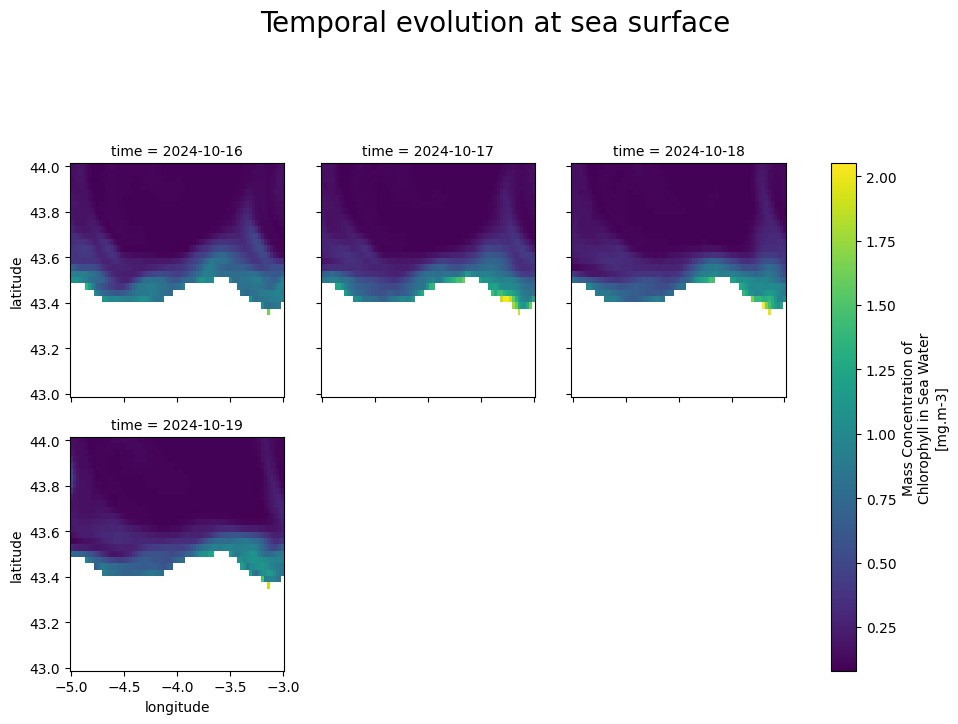

In [10]:
# As always, start by importing the packages we need
import matplotlib.pyplot as plt
import xarray
# - Temporal evolution at sea surface
response_bay["chl"].isel(depth=10).plot(col="time", col_wrap=3)
plt.suptitle("Temporal evolution at sea surface", fontsize=20, y=1.2)
plt.show()

Text(0.5, 1.2, 'Evolution at different depths')

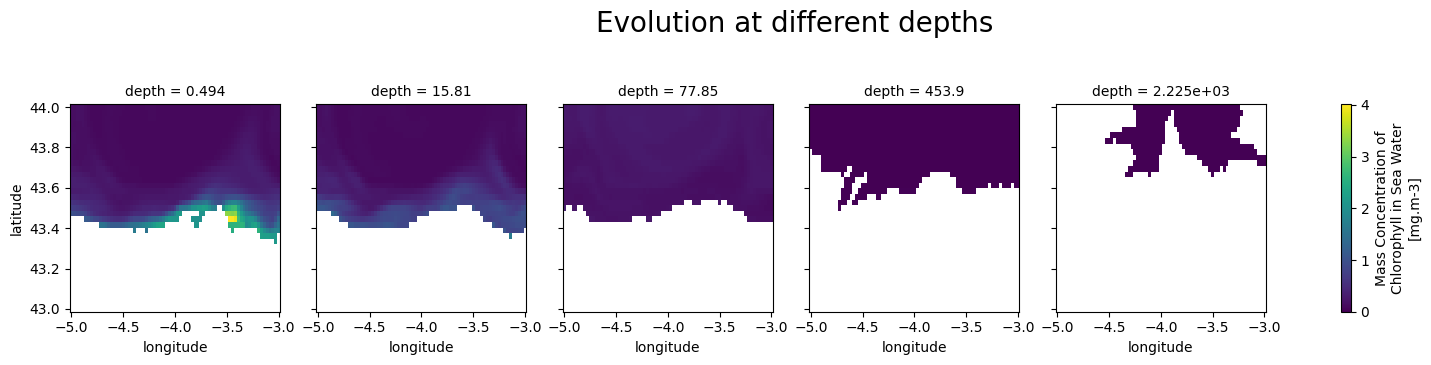

In [11]:
# - Vertical evolution
response_bay["chl"].sel(time="2024-10-16").isel(depth=slice(0, -1, 10)).plot(col="depth", col_wrap=5)
plt.suptitle("Evolution at different depths", fontsize=20, y=1.2)

### Time Series

Thanks to the `.zarr` files, we can easily obtain the data we are interested in at a specific point but at various moments in time.

For example, we can see how the sea behaved at the beginning of September 2023, when it rained a lot in Santander:


In [12]:
# Now we can focus on the parameters that interest us: in Santander, in September 2023.
response_santander = copernicusmarine.open_dataset(dataset_id="cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m", 
                        variables=["chl", "o2"],
                        maximum_longitude=-3.749544,  # Longitude in Santander
                        minimum_longitude=-3.749544,
                        minimum_latitude=43.478975,   # Latitude in Santander
                        maximum_latitude=43.478975,
                        start_datetime="2023-09-01", end_datetime="2023-09-30")
response_santander

Fetching catalog: 100%|██████████| 3/3 [00:10<00:00,  3.53s/it]
INFO - 2024-10-17T10:40:35Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2024-10-17T10:40:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-10-17T10:40:36Z - Service was not specified, the default one was selected: "arco-time-series"


<xarray.Dataset> Size: 24kB
Dimensions:    (depth: 50, latitude: 1, longitude: 1, time: 30)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 4B 43.47
  * longitude  (longitude) float32 4B -3.75
  * time       (time) datetime64[ns] 240B 2023-09-01 2023-09-02 ... 2023-09-30
Data variables:
    chl        (time, depth, latitude, longitude) float64 12kB ...
    o2         (time, depth, latitude, longitude) float64 12kB ...
Attributes: (12/21)
    Conventions:     CF-1.0
    bulletin_date:   2021-04-19
    bulletin_type:   Operational
    contact:         mailto: servicedesk.cmems@mercator-ocean.eu
    domain_name:     IBI36
    easting:         longitude
    ...              ...
    northing:        latitude
    references:      http://marine.copernicus.eu/
    source:          NEMO3.6-PISCES3.6
    title:           Biogeochemical 3D daily mean fields for the Iberia-Bisca...
    z_max:           5727.917f
    z_min:           0.49402f

Perfect, now that we have the data we are interested in, let’s take a closer look at its content.  
#### Open the NetCDF and create simple graphs.

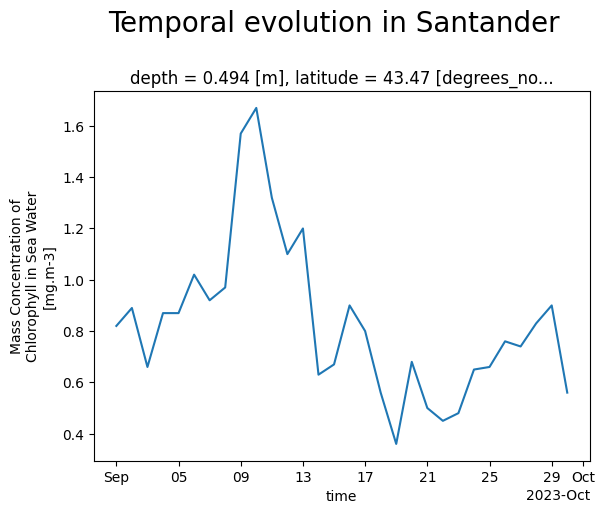

In [13]:
# Chose the variable we want and look at the data (everything remotely)
response_santander['chl'].isel(depth=0).plot()
plt.suptitle("Temporal evolution in Santander", fontsize=20, y=1.05)
plt.show()

If we want to **save the file locally**, we can use the **`subset`** function, which allows us, among other things, to also select the file format: **NetCDF** or **Zarr**.

## CopernicusMarineToolbox - Subset
[Copernicus Marine Toolbox API - Subset](https://help.marine.copernicus.eu/en/articles/8283072-copernicus-marine-toolbox-api-subset)

In [14]:
help(copernicusmarine.subset)

Help on function subset in module copernicusmarine.python_interface.subset:

subset(dataset_url: Optional[str] = None, dataset_id: Optional[str] = None, dataset_version: Optional[str] = None, dataset_part: Optional[str] = None, username: Optional[str] = None, password: Optional[str] = None, variables: Optional[List[str]] = None, minimum_longitude: Optional[float] = None, maximum_longitude: Optional[float] = None, minimum_latitude: Optional[float] = None, maximum_latitude: Optional[float] = None, minimum_depth: Optional[float] = None, maximum_depth: Optional[float] = None, vertical_dimension_as_originally_produced: bool = True, start_datetime: Union[datetime.datetime, str, NoneType] = None, end_datetime: Union[datetime.datetime, str, NoneType] = None, subset_method: Literal['nearest', 'strict'] = 'nearest', output_filename: Optional[str] = None, file_format: Literal['netcdf', 'zarr'] = 'netcdf', service: Optional[str] = None, request_file: Union[pathlib.Path, str, NoneType] = None, outp

In [15]:
copernicusmarine.subset(dataset_id="cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m", 
                        variables=["chl", "o2"],
                        maximum_longitude=-3,  
                        minimum_longitude=-5,  
                        minimum_latitude=43,   
                        maximum_latitude=44,
                        start_datetime="2023-09-01", end_datetime="2023-09-30", 
                        file_format="netcdf", # allows us to specify the format of the output
                        force_download=True) # we don't need to confirm the download (we already know it will be interesting!)

Fetching catalog: 100%|██████████| 3/3 [00:10<00:00,  3.42s/it]
INFO - 2024-10-17T10:40:55Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2024-10-17T10:40:55Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-10-17T10:40:57Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2024-10-17T10:40:58Z - Downloading using service arco-time-series...
INFO - 2024-10-17T10:41:00Z - Estimated size of the dataset file is 61.855 MB.
INFO - 2024-10-17T10:41:00Z - Writing to local storage. Please wait...


  0%|          | 0/3402 [00:00<?, ?it/s]

INFO - 2024-10-17T10:41:11Z - Successfully downloaded to cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m_chl-o2_5.00W-3.00W_43.00N-44.00N_0.49-5727.92m_2023-09-01-2023-09-30.nc


PosixPath('cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m_chl-o2_5.00W-3.00W_43.00N-44.00N_0.49-5727.92m_2023-09-01-2023-09-30.nc')

This downloaded file will be stored in the indicated local directory (or in the default one if none is specified). It can then be opened and used with the preferred method (in Python, Matlab, etc.) or software, such as [Panoply](https://www.giss.nasa.gov/tools/panoply/) and [QGIS](https://qgis.org/).

## CopernicusMarineToolbox - Get
[Copernicus Marine Toolbox API - Get original files](https://help.marine.copernicus.eu/en/articles/8286883-copernicus-marine-toolbox-api-get-original-files)

To download the original data, you can use the **`get`** command.

Let’s see what it can do:


In [16]:
help(copernicusmarine.get)

Help on function get in module copernicusmarine.python_interface.get:

get(dataset_url: Optional[str] = None, dataset_id: Optional[str] = None, dataset_version: Optional[str] = None, dataset_part: Optional[str] = None, username: Optional[str] = None, password: Optional[str] = None, no_directories: bool = False, show_outputnames: bool = False, output_directory: Union[pathlib.Path, str, NoneType] = None, credentials_file: Union[pathlib.Path, str, NoneType] = None, force_download: bool = False, overwrite_output_data: bool = False, request_file: Union[pathlib.Path, str, NoneType] = None, service: Optional[str] = None, overwrite_metadata_cache: bool = False, no_metadata_cache: bool = False, filter: Optional[str] = None, regex: Optional[str] = None, file_list: Union[pathlib.Path, str, NoneType] = None, create_file_list: Optional[str] = None, download_file_list: bool = False, index_parts: bool = False, sync: bool = False, sync_delete: bool = False, disable_progress_bar: bool = False, staging:

In [17]:
# Download all the files from the first dataset
copernicusmarine.get(dataset_id="cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m") 
# probably we don't want to download all files, but we can run it and then not proceed with the download

Fetching catalog: 100%|██████████| 3/3 [00:10<00:00,  3.58s/it]
INFO - 2024-10-17T10:41:36Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2024-10-17T10:41:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-10-17T10:41:36Z - Service was not specified, the default one was selected: "original-files"
INFO - 2024-10-17T10:41:36Z - Downloading using service original-files...
INFO - 2024-10-17T10:41:36Z - You requested the download of the following files:
s3://mdl-native-10/native/IBI_ANALYSISFORECAST_BGC_005_004/cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m_202211/2022/10/CMEMS_v7r1_IBI_BIO_NRT_NL_01dav_20221001_20221001_R20221017_AN04.nc - 82.48 MB - 2023-11-12T14:01:32Z
s3://mdl-native-10/native/IBI_ANALYSISFORECAST_BGC_005_004/cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m_202211/2022/10/CMEMS_v7r1_IBI_BIO_NRT_NL_01dav_20221002_20221002_R20221017_AN05.nc - 82.77 MB - 2023-11-12T14:01:38Z
s3://mdl-native-10/native/IBI_ANALYSISFO

Abort


In [18]:
# Filter and download specific fles, for example, a specific month (in this case, October 2024)
copernicusmarine.get(dataset_id="cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m", filter="*202410*")

Fetching catalog:  33%|███▎      | 1/3 [00:10<00:20, 10.49s/it]INFO - 2024-10-17T10:41:53Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2024-10-17T10:41:53Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-10-17T10:41:53Z - Service was not specified, the default one was selected: "original-files"
INFO - 2024-10-17T10:41:53Z - Downloading using service original-files...
Fetching catalog: 100%|██████████| 3/3 [00:10<00:00,  3.58s/it]
INFO - 2024-10-17T10:41:54Z - You requested the download of the following files:
s3://mdl-native-10/native/IBI_ANALYSISFORECAST_BGC_005_004/cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m_202211/2024/09/CMEMS_v7r1_IBI_BIO_NRT_NL_01dav_20240918_20240918_R20241007_AN01.nc - 85.55 MB - 2024-10-07T06:06:35Z
s3://mdl-native-10/native/IBI_ANALYSISFORECAST_BGC_005_004/cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1D-m_202211/2024/09/CMEMS_v7r1_IBI_BIO_NRT_NL_01dav_20240919_20240919_R20241007_AN02.nc - 85.54 MB 

Abort


Thanks to this method, it is also possible to **download INSITU data**!

Let’s look at an example:

In advance, we have already found the files that contain INSITU observations of oxygen in the Bay of Santander, from the `index_history.txt` files of the product [INSITU_IBI_PHYBGCWAV_DISCRETE_MYNRT_013_033](https://data.marine.copernicus.eu/product/INSITU_IBI_PHYBGCWAV_DISCRETE_MYNRT_013_033/description).

And we download them:


In [27]:
# With defined coordinates and that they have oxygen:
import copernicusmarine
copernicusmarine.get(dataset_id="cmems_obs-ins_ibi_phybgcwav_mynrt_na_irr", file_list="./INSITU_IBI_013_033.txt")

Fetching catalog:  33%|███▎      | 1/3 [00:10<00:20, 10.36s/it]INFO - 2024-10-17T12:01:46Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-10-17T12:01:46Z - Dataset part was not specified, the first one was selected: "latest"
INFO - 2024-10-17T12:01:46Z - Service was not specified, the default one was selected: "original-files"
INFO - 2024-10-17T12:01:46Z - Downloading using service original-files...
Fetching catalog: 100%|██████████| 3/3 [00:11<00:00,  3.75s/it]
INFO - 2024-10-17T12:01:53Z - You requested the download of the following files:
s3://mdl-native-03/native/INSITU_IBI_PHYBGCWAV_DISCRETE_MYNRT_013_033/cmems_obs-ins_ibi_phybgcwav_mynrt_na_irr_202311/history/CT/GL_PR_CT_EAEF.nc - 243.09 kB - 2023-12-04T10:53:05Z
s3://mdl-native-03/native/INSITU_IBI_PHYBGCWAV_DISCRETE_MYNRT_013_033/cmems_obs-ins_ibi_phybgcwav_mynrt_na_irr_202311/history/CT/GL_PR_CT_EXSD0953.nc - 130.06 kB - 2024-02-24T10:49:52Z
s3://mdl-native-03/native/INSITU_IBI_PHYBGCWAV

Abort


Once the files are downloaded, we will open them and extract the exact spatial coordinates (longitude and latitude) and the name/reference number of the station. This way, we can create a map and see exactly where it is located.


/var/folders/np/b0vs84gj635cbf56__s7bg500000gn/T/ipykernel_13000/1638569332.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', num_platforms)


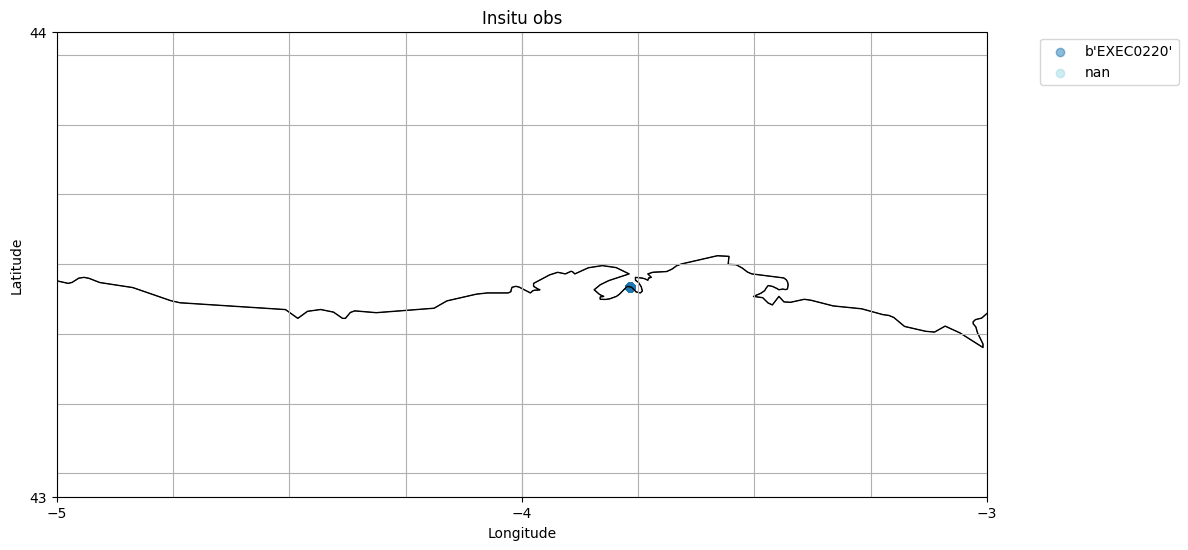

In [28]:
import glob
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

directory = "./INSITU_IBI_PHYBGCWAV_DISCRETE_MYNRT_013_033/cmems_obs-ins_ibi_phybgcwav_mynrt_na_irr_202311/history"

dfs = []

def open_files(directories, file_pattern='*.nc'):
    for directory in directories:
        file_paths = glob.glob(os.path.join(directory, file_pattern))
        for file_path in file_paths:
            ds = xr.open_dataset(file_path)
            df = ds.to_dataframe().reset_index()
            dfs.append(df)
            
    merged_df = pd.concat(dfs, axis=0)  
    return merged_df

directories = [
    f'{directory}/BO',
    f'{directory}/CT',
]

combined_df = open_files(directories)


lon = combined_df['LONGITUDE']
lat = combined_df['LATITUDE']
platform = combined_df["STATION"]
unique_platforms = combined_df['STATION'].unique()
num_platforms = len(unique_platforms)

colormap = plt.cm.get_cmap('tab20', num_platforms)
color_mapping = {platform: colormap(i) for i, platform in enumerate(unique_platforms)}

combined_df.loc[:, 'color'] = combined_df['STATION'].map(color_mapping)

# Plotting
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, linewidth=0.5, facecolor='white', edgecolor='black', zorder=1)
ax.axis('on')
ax.gridlines()
ax.coastlines()

for platform in color_mapping.keys():
    platform_data = combined_df[combined_df['STATION'] == platform]
    plt.scatter(platform_data["LONGITUDE"], platform_data["LATITUDE"], 
                c=[color_mapping[platform]], label=platform, marker='o', alpha=0.5)

plt.title('Insitu obs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.xlim(-5, -3)
plt.ylim(43, 44)

# Add major and minor ticks for both axes
plt.xticks(ticks=range(int(-5), int(-3)+1))
plt.yticks(ticks=range(int(43), int(44)+1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

plt.show()

Lastly, we can also plot the time series.


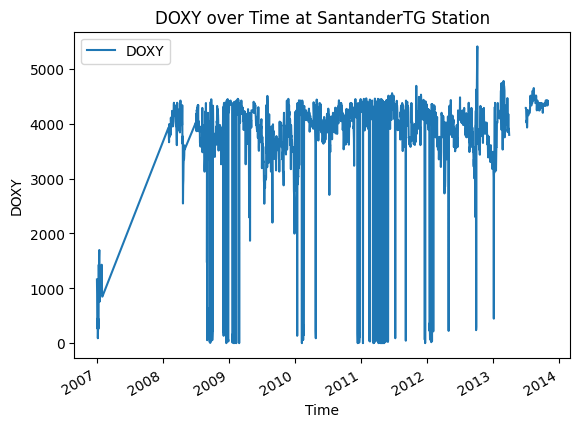

In [34]:
# Extract in-situ station coordinates in Santander

if combined_df['STATION'].dtype == 'O': 
    combined_df['STATION'] = combined_df['STATION'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Filter the DataFrame and select specific columns
santander_tg_station = combined_df[
    (combined_df["STATION"] == "EXEC0220")
][["LONGITUDE", "LATITUDE", "DOXY", "TIME"]].copy()

# Plot the data
santander_tg_station.plot(x='TIME', y='DOXY', kind='line', title='DOXY over Time at SantanderTG Station')

plt.xlabel('Time')
plt.ylabel('DOXY')
plt.show()
